# <center>Automated Mapping of Sea Surface Temperature with shell scripting and Python</center>
---

In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.pyplot import tick_params
# from matplotlib.font_manager import get_fontconfig_fonts
from datetime import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from pyproj import transform

In [ ]:
def get_url(start_date, end_date, lat)

In [18]:
region = 'California'
d = os.path.join('data', os.listdir('data')[0])
d

'data/latest_MUR_SST_California.nc'

In [19]:
# open netcdf file as an xarray dataset
ds = xr.open_dataset(d)
# open single variables in the xarray dataset
# sst_3d = ds["analysed_sst"] + 273.15
sst_3d = ds["analysed_sst"]
#reduce dimensions to 2d
sst = sst_3d.squeeze()

In [22]:
ds.attrs['region'] = region
ds

<xarray.Dataset>
Dimensions:         (time: 1, latitude: 1501, longitude: 1501)
Coordinates:
  * time            (time) datetime64[ns] 2022-07-21T09:00:00
  * latitude        (latitude) float32 30.0 30.01 30.02 ... 44.98 44.99 45.0
  * longitude       (longitude) float32 -130.0 -130.0 -130.0 ... -115.0 -115.0
Data variables:
    analysed_sst    (time, latitude, longitude) float64 ...
    analysis_error  (time, latitude, longitude) float64 ...
    mask            (time, latitude, longitude) float32 ...
    region          <U10 'California'
Attributes: (12/51)
    acknowledgement:            Please acknowledge the use of these data with...
    cdm_data_type:              Grid
    comment:                    MUR = "Multi-scale Ultra-high Reolution"
    Conventions:                CF-1.6, COARDS, ACDD-1.3
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    creator_name:               JPL MUR SST project
    ...                         ...
    testOutOfDate:              now-3days
    time_coverage_end:          2022-07-21T09:00:00Z
    time_coverage_start:        2022-07-21T09:00:00Z
    title:                      Daily MUR SST, Final product (MUR-JPL-L4-GLOB...
    Westernmost_Easting:        -130.0
    region:                     California

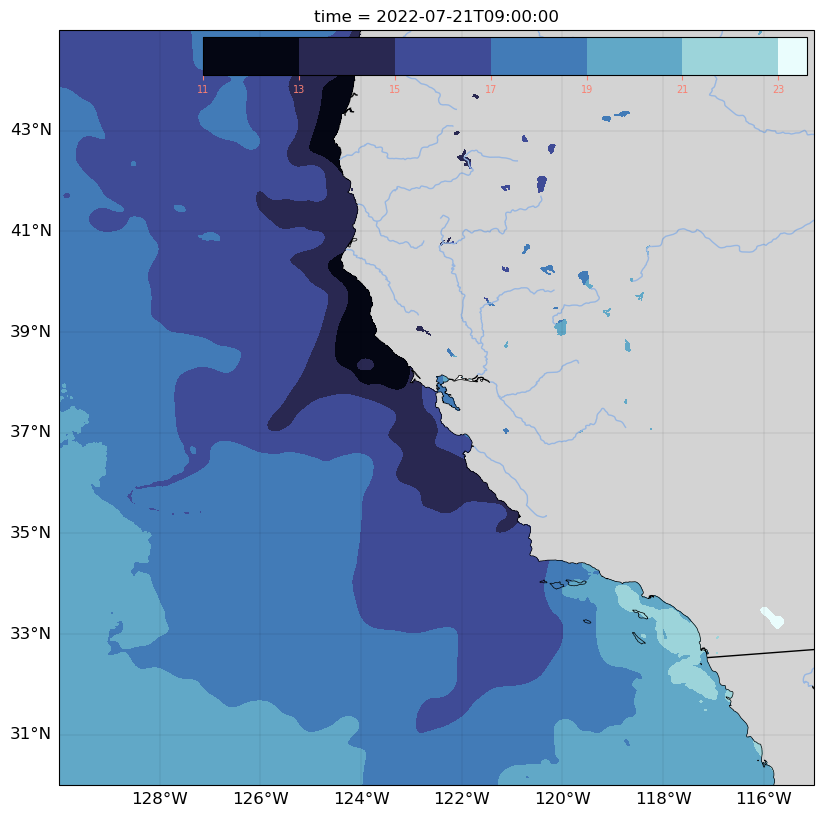

In [17]:
# Generate figure (set its size (width, height) in inches).
fig = plt.figure(figsize=(12, 10), dpi=100)
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines(linewidths=0.5)
ax.add_feature(cfeature.LAND, facecolor="lightgray")
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.RIVERS)


# get the min, max for SST, convert to a scalar, and round off
varmin = sst.min()
sstmin = int(round(varmin.item(),0))
varmax = sst.max()
sstmax = int(round(varmax.item(),0))
sst_int = int(sstmax - sstmin)
if sst_int >=6:
    contour_levels = np.array(range(sstmin,sstmax,2))
elif sst_int <6:
    contour_levels = np.array(range(sstmin,sstmax,1))
    
    
################################################
# Plot data
###############################################
pt_sst = sst.plot.contourf(ax=ax,
    transform=ccrs.PlateCarree(),
    levels=contour_levels,
    cmap=cmo.cm.ice,
    add_colorbar=False,
    zorder=0,
)

# color bar ################
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cax = inset_axes(ax,
    width="80%",  # width = 80% of parent_bbox width
    height="5%",  # height : 5%
    loc='upper right',
)
# axins1.gridlines(draw_labels=False)
cbar = plt.colorbar(pt_sst,
    cax=cax,
    orientation="horizontal",
    extendrect=True,
)
cbar.ax.tick_params(labelsize=7, colors='salmon')
gl = ax.gridlines(draw_labels=True,
    dms=True,
    x_inline=False,
    y_inline=False,
    linewidth=0.25,
    color="black",
    alpha=0.25,
)

# Manipulate latitude and longitude gridline numbers and spacing

gl.top_labels = False
gl.right_labels = False
if region == "New_Zealand":
    gl.xlocator = mticker.FixedLocator([163, 167, 171, 175, 179])
    gl.ylocator = mticker.FixedLocator([-48, -46, -44, -42, -40, 
                                        38, -36, -34, -32])
elif region == "California":
    gl.xlocator = mticker.FixedLocator([-130, -128, -126, -124,
                                        -122, -120, -118, -116])
    gl.ylocator = mticker.FixedLocator([31, 33, 35, 37, 39, 41, 43])
    gl.xlabel_style = {"rotation": 0, "size": 12}
    gl.ylabel_style = {"rotation": 0, "size": 12}

plt.show()